In [ ]:
skip_training = False # True before validation

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Select device which you are going to use for training
#device = torch.device("cuda:0")
device = torch.device("cpu")

In [ ]:
if skip_training:
    # The models are always evaluated on CPU
    device = torch.device("cpu")

# **Generating Data** 

In [ ]:
# Generating a dataset
def get_data():
    np.random.seed()
    x = np.random.randn(100,1)
    x = np.sort(x,axis=0)
    
    target = 2 * np.tanh(x * 2 * np.pi /3)
    target = target + 0.2 * np.random.randn(*target.shape)
    
    x = torch.FloatTensor(x)
    target = torch.FloatTensor(target)
    
    return x, target

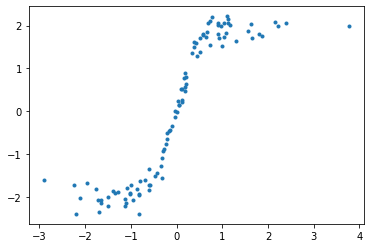

In [ ]:
x, target = get_data()
fix, ax = plt.subplots(1)
ax.plot(x,target, '.')

In [ ]:
class MLP(nn.Module):
    def __init__(self, n_inputs = 1):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,11)
        self.fc3 = nn.Linear(11,1)
    
    def forward(self,x):
        x1 = torch.tanh(self.fc1(x))
        x2 = torch.tanh(self.fc2(x1))
        y = self.fc3(x2)
        return y

In [ ]:
model = MLP()
model.to(device)

MLP(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (fc3): Linear(in_features=11, out_features=1, bias=True)
)

In [ ]:
if not skip_training:
    iteration = 200
    l_r = 0.01
    criterion = F.mse_loss
    model.zero_grad()
    optimizer = torch.optim.Adam(model.parameters(),l_r)
    
    for _ in range(iteration):
        optimizer.zero_grad()
        y_predict = model(x)
        loss = criterion(target, y_predict)
        loss.backward()
        optimizer.step()
        print(loss)

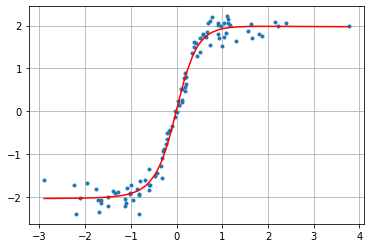

In [ ]:
with torch.no_grad():
    fig, ax = plt.subplots(1)
    ax.plot(x,target,'.')
    y_predict = model(x)
    ax.plot(x,y_predict.numpy(),'r-')
    ax.grid(True)